 74%|███████▍  | 2291/3085 [00:03<00:01, 667.89it/s]

100%|██████████| 3085/3085 [00:04<00:00, 658.88it/s]


(5450679, './all_pairs_full/pair2041/input_pair2041.png')


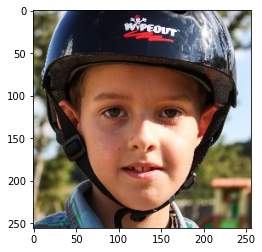

(5450679, './all_pairs_full/pair2040/input_pair2040.png')


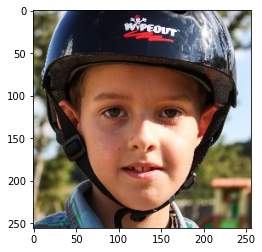

(5450679, './all_pairs_full/pair2039/input_pair2039.png')


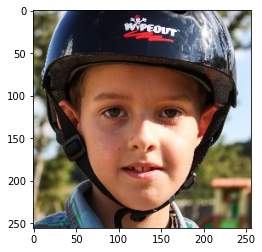

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob, os, tqdm

search_path = './all_pairs_full/'
search_img = './search_for/s2.png'
search_img = np.array(Image.open(search_img).resize((256, 256)).convert('RGB'))

diff_list = []
for p in tqdm.tqdm(glob.glob(search_path + '/*')):
    pid = p.split('/')[-1][4:]
    img_name = p + f'/input_pair{pid}.png'
    if os.path.exists(img_name):
        img = np.array(Image.open(img_name).convert('RGB'))
        # Search image that is most similar to the input image
        diff = np.sum((search_img - img)**2)
        diff_list.append((diff, img_name))
        
diff_list.sort(key=lambda x: x[0])
# diff_list = diff_list[::-1]
# Show top3 images and name
for i in range(3):
    print(diff_list[i])
    plt.imshow(np.array(Image.open(diff_list[i][1])))
    plt.show()

        

In [16]:
os.system('cp -r ./all_pairs_full/pair2581 ./pairs_for_ui_figure/')
os.system('cp -r ./all_pairs_full/pair9 ./pairs_for_ui_figure/')
os.system('cp -r ./all_pairs_full/pair12 ./pairs_for_ui_figure/')
os.system('cp -r ./all_pairs_full/pair2132 ./pairs_for_ui_figure/')
os.system('cp -r ./all_pairs_full/pair77 ./pairs_for_ui_figure/')
os.system('cp -r ./all_pairs_full/pair2040 ./pairs_for_ui_figure/')

0

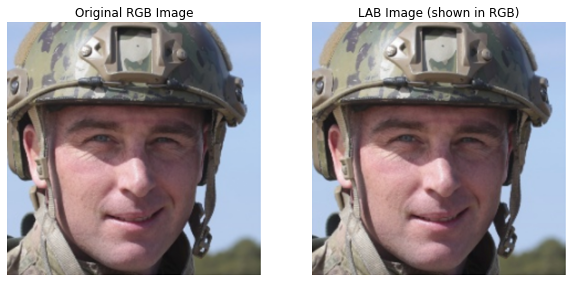

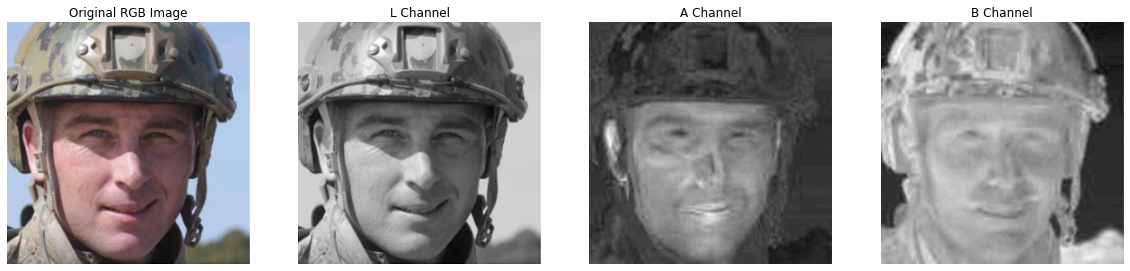

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

def convert_rgb_to_lab(rgb_image):
    # Convert the RGB image to LAB color space
    lab_image = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2LAB)
    return lab_image

def display_images_side_by_side(rgb_image, lab_image):
    # Convert LAB image back to RGB for visualization purposes
    lab_image_rgb = cv2.cvtColor(lab_image, cv2.COLOR_LAB2RGB)
    
    # Display both images side-by-side for comparison
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(rgb_image)
    axes[0].set_title('Original RGB Image')
    axes[0].axis('off')

    axes[1].imshow(lab_image_rgb)
    axes[1].set_title('LAB Image (shown in RGB)')
    axes[1].axis('off')

    plt.show()

def display_images_with_channels(rgb_image, lab_image):
    # Splitting the LAB image into its channels
    L_channel, A_channel, B_channel = cv2.split(lab_image)
    
    # Display the original RGB image and each LAB channel
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))  # 1 row, 4 columns
    
    # Display the original RGB image
    axes[0].imshow(rgb_image)
    axes[0].set_title('Original RGB Image')
    axes[0].axis('off')
    
    # Display the L channel
    axes[1].imshow(L_channel, cmap='gray')
    axes[1].set_title('L Channel')
    axes[1].axis('off')
    
    # Display the A channel
    axes[2].imshow(A_channel, cmap='gray')
    axes[2].set_title('A Channel')
    axes[2].axis('off')
    
    # Display the B channel
    axes[3].imshow(B_channel, cmap='gray')
    axes[3].set_title('B Channel')
    axes[3].axis('off')

    plt.show()

# Assuming you have an RGB image loaded into `rgb_image`, for example:
rgb_image = cv2.imread('./search_for/s1.png')
# Note: OpenCV reads images in BGR format, you might need to convert it to RGB.
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

# Convert RGB to LAB
lab_image = convert_rgb_to_lab(rgb_image)

# Display both images
display_images_side_by_side(rgb_image, lab_image)
display_images_with_channels(rgb_image, lab_image)
